## Selecting area of interest

#### Applying canny edge detection before selecting area of interest 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# readd the image
img = cv2.imread('road.png',0)

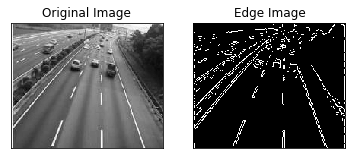

In [3]:
# canny edge detection

edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

#### Applying canny edge detection after selecting area of interest

(166, 201, 3)


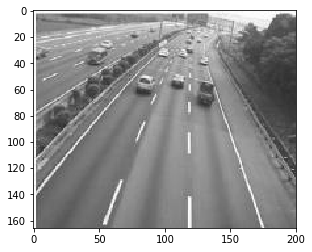

In [4]:
# print the coordinates
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);
print(img.shape)

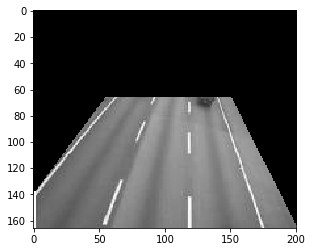

In [5]:
# select the area of interest and mask it

import numpy as np

height = img.shape[0]
width = img.shape[1]

# region of interest
region_of_interest_vertices = [
    
    (0,height),
    (0,140),
    (55,66),
    (150,66),
    (width,height)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,)* channel_count
    cv2.fillPoly(mask, vertices,match_mask_color)
    masked_image =cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(img,np.array([region_of_interest_vertices], np.int32,))
plt.imshow(cropped_image);

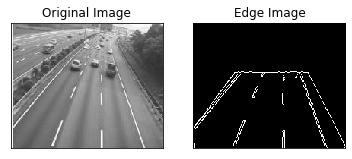

In [6]:
# apply canny edge detection

edges = cv2.Canny(cropped_image,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

 > But in above image region of interest is also detected , meaning the border is also detected this is because we are passing gray scale image for masking then canny edge detection is applied
 <b> This can be tackled as follows: </b>

## step1 : first apply canny edge detection

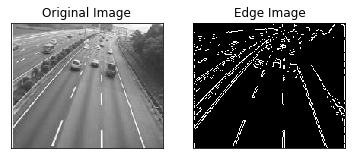

In [7]:
edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

## step 2 : select the area of interest as follows:



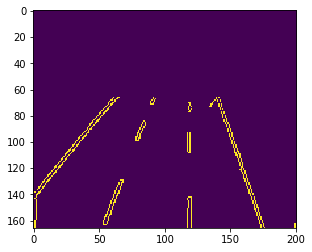

In [8]:
height = img.shape[0]
width = img.shape[1]

# region of interest
region_of_interest_vertices = [
    
    (0,height),
    (0,140),
    (55,66),
    (150,66),
    (width,height)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    match_mask_color = 255
    cv2.fillPoly(mask, vertices,match_mask_color)
    masked_image =cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32,)) # canny image is passesd
plt.imshow(cropped_image);